In [1]:
import numpy as np
from trackhhl.toy import simple_generator as toy
from trackhhl.hamiltonians import simple_hamiltonian as hamiltonian
import matplotlib.pyplot as plt

In [2]:
N_MODULES = 26
LX = float("+inf")
LY = float("+inf")
Z_SPACING = 1.0

detector = toy.SimpleDetectorGeometry(
    module_id=list(range(N_MODULES)),
    lx=[LX]*N_MODULES,
    ly=[LY]*N_MODULES,
    z=[i+Z_SPACING for i in range(N_MODULES)]
)

generator = toy.SimpleGenerator(
    detector_geometry=detector,
    theta_max=np.pi/6
)

N_PARTICLES = 8
N_EVENTS = 4
SIGMA = 1
events = generator.generate_event(N_PARTICLES, N_EVENTS, SIGMA)
event = events[0]


In [3]:
def cartesian_to_spherical_vectorized(cartesian_coords, translation=(0, 0, 0)):
    x, y, z = cartesian_coords[:, 0] - translation[0], cartesian_coords[:, 1] - translation[1], cartesian_coords[:, 2] - translation[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    phi = np.arccos(z / r)
    return r, theta, phi

In [4]:
event_hits = []
events_store = []
for event_ in events:
    for hit in event_.hits:
        event_hits.append([hit.x,hit.y,hit.z,hit.track_id])
    events_store.append(event_hits)
structured_array = np.array(events_store)
cartesian_coords = structured_array[:, :, :3]  


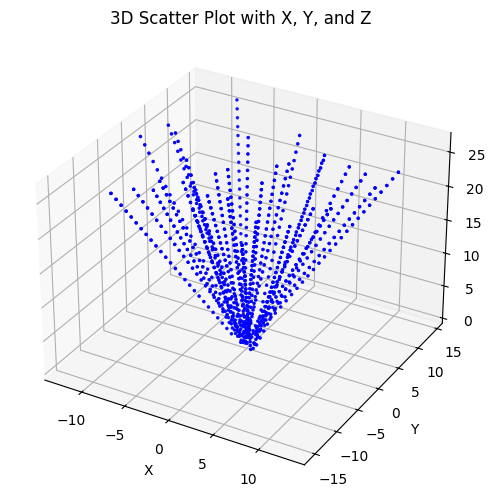

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
for structured_array_ in structured_array:
    ax.scatter(structured_array_[:,0], structured_array_[:,1], structured_array_[:,2], c='b', marker='o', s=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Scatter Plot with X, Y, and Z')
plt.show()

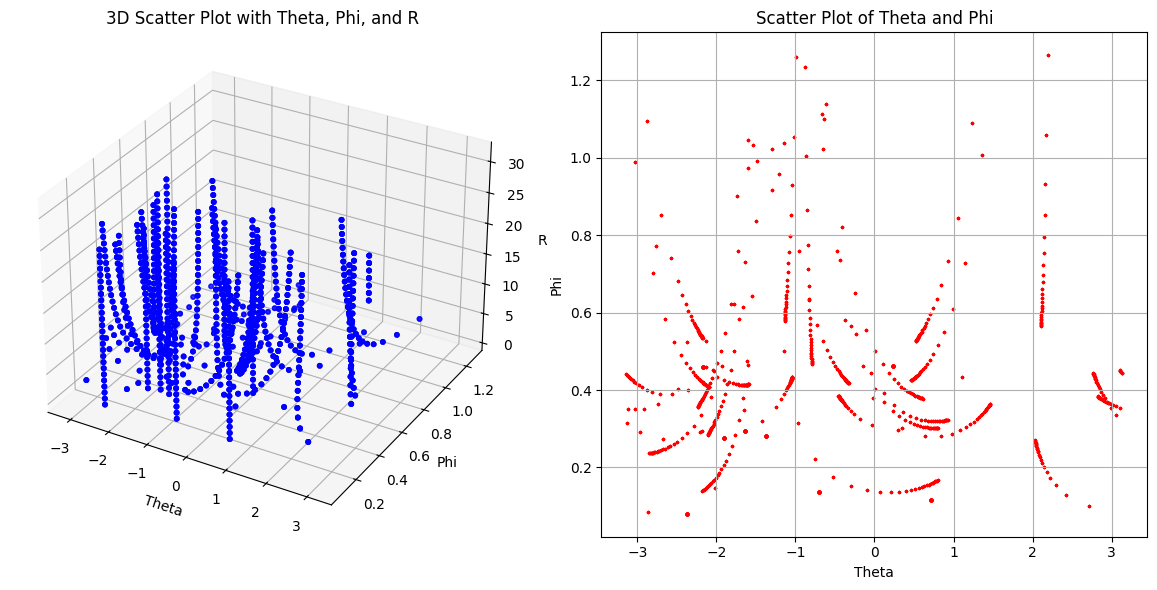

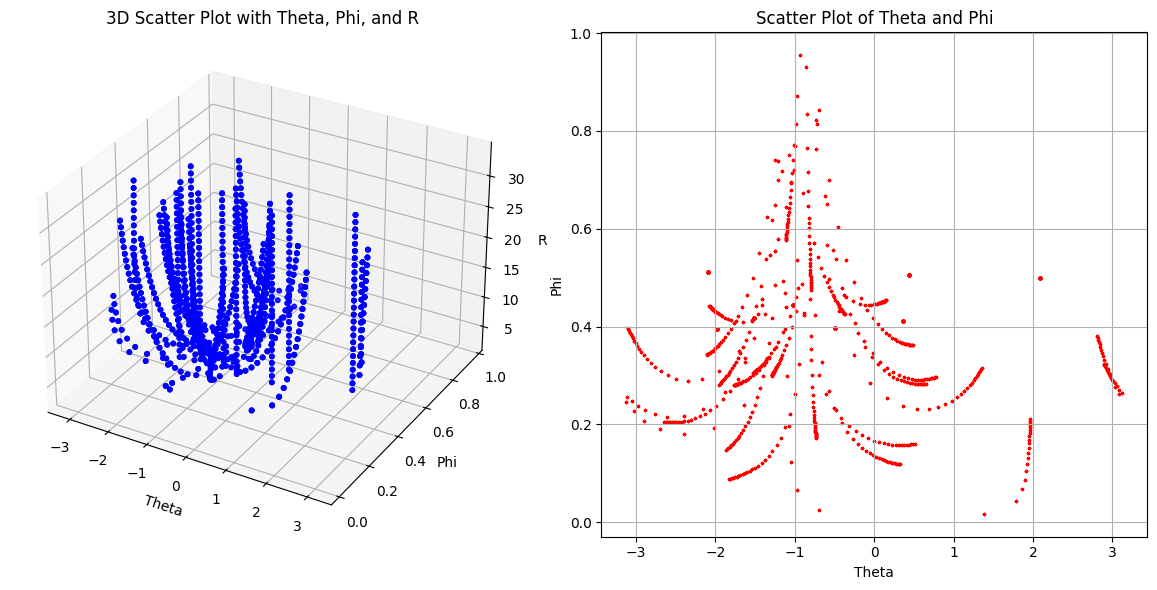

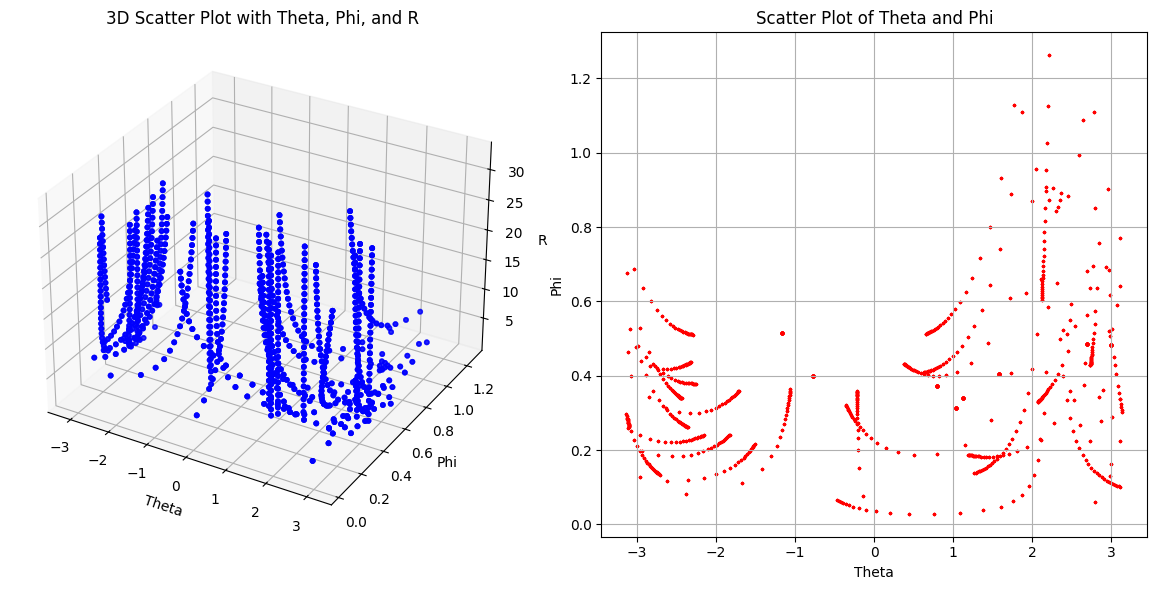

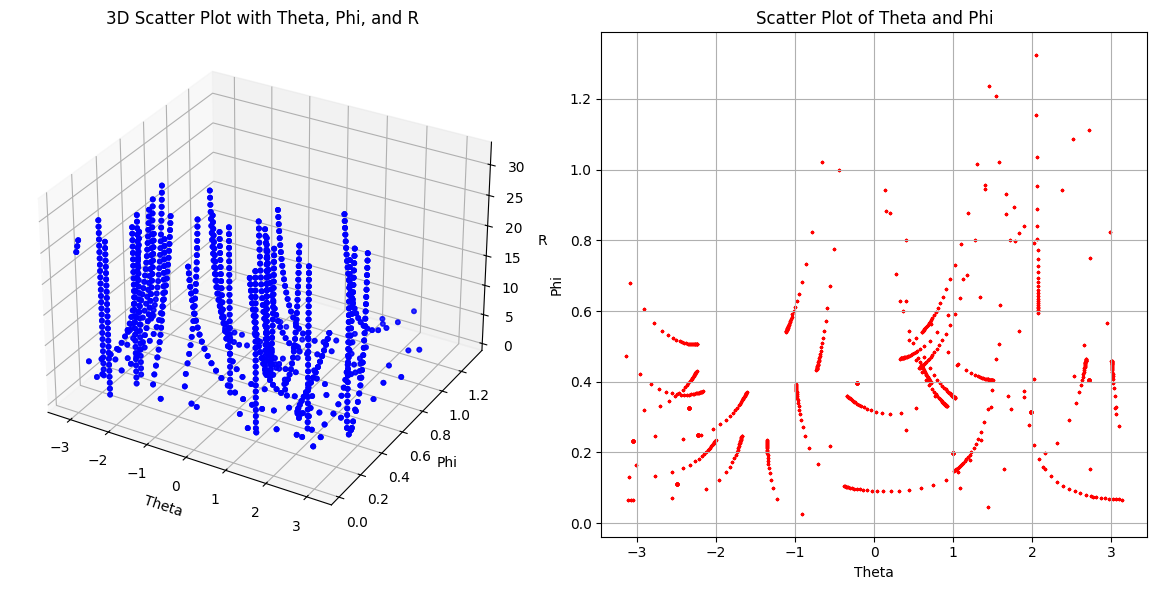

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    for coord in cartesian_coords:
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        r.append(r_)
        theta.append(thetas_)
        phi.append(phi_)

    fig = plt.figure(figsize=(18, 6))

    # Plot the 3D scatter plot with Theta, Phi, and R
    ax1 = fig.add_subplot(131, projection='3d')
    for i in range(len(r)):
        ax1.scatter(theta[i], phi[i], r[i], c='b', marker='o', s=10)  
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.set_zlabel('R')
    ax1.set_title('3D Scatter Plot with Theta, Phi, and R')

    # Create a scatter plot with just Theta and Phi
    ax2 = fig.add_subplot(132)
    for i in range(len(theta)):
        ax2.scatter(theta[i], phi[i], c='r', marker='o', s=2)  
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.set_title('Scatter Plot of Theta and Phi')

    plt.grid()
    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()


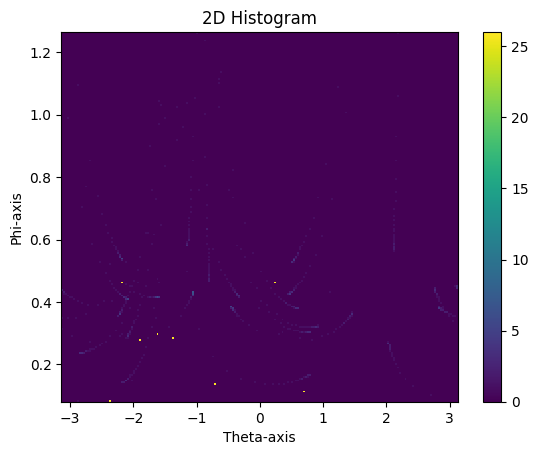

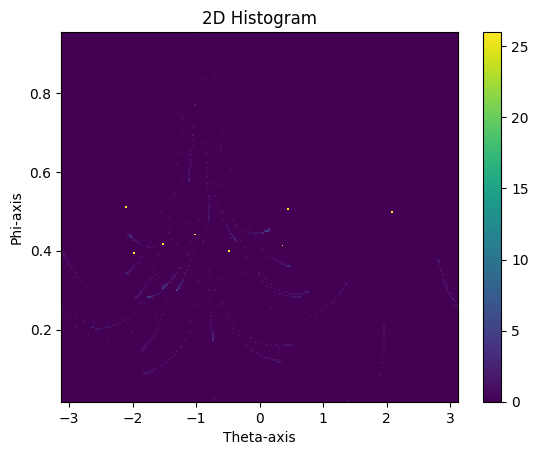

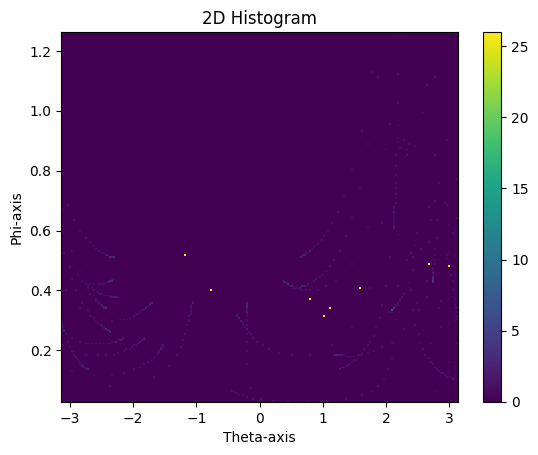

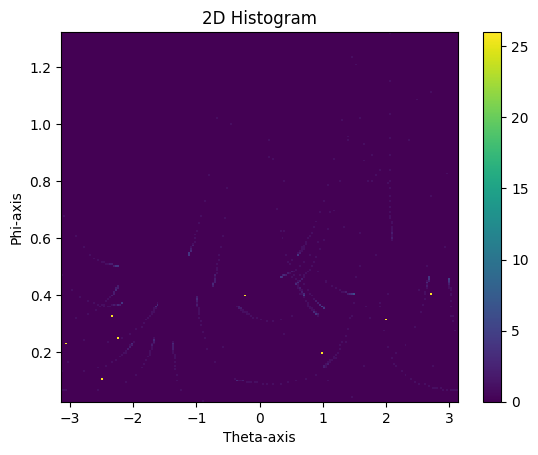

In [7]:
for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    for coord in cartesian_coords:
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        r.append(r_)
        theta.append(thetas_)
        phi.append(phi_)
    for i in range(len(theta)):
        plt.hist2d(theta[i], phi[i], bins=(200, 200), cmap='viridis')
    plt.colorbar()
    plt.xlabel('Theta-axis')
    plt.ylabel('Phi-axis')
    plt.title('2D Histogram')
    plt.show()

In [8]:
theta_phi = []

for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    
    for coord in cartesian_coords:
        
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        theta.append(thetas_)
        phi.append(phi_)
    
    theta = np.array(theta)
    theta = np.sum(theta, axis=0)
    phi = np.array(phi)
    phi = np.sum(phi, axis=0)

    
    hist, x_edges, y_edges = np.histogram2d(theta, phi, bins=(200, 200))
    
    x_indices, y_indices = np.where(hist > 2)
    
    for x, y in zip(x_indices, y_indices):
        theta_phi.append((x_edges[x] + (x_edges[x + 1] - x_edges[x]) / 2, y_edges[y] + (y_edges[y + 1] - y_edges[y]) / 2))

theta_phi

[(-12.495582638846969, 1.7540808160048746),
 (-11.366095406228549, 0.9489091651531194),
 (-11.2405968248265, 0.9489091651531194),
 (-9.483616685197847, 0.33318966744295375),
 (-8.856123778187612, 1.4462210671497917),
 (-8.856123778187612, 2.180348160573451),
 (-8.730625196785565, 1.8488068925756693),
 (-8.730625196785565, 2.1566666414307525),
 (-8.605126615383519, 1.65935473943408),
 (-8.479628033981472, 0.5936863780126392),
 (-8.479628033981472, 1.6356732202913813),
 (-8.354129452579425, 1.1620428374374074),
 (-8.354129452579425, 1.6356732202913813),
 (-7.601137964167144, 1.11467979915201),
 (-6.597149312950769, 1.65935473943408),
 (-6.471650731548723, 1.1857243565801063),
 (-6.471650731548723, 1.65935473943408),
 (-6.346152150146676, 1.65935473943408),
 (-5.467662080332349, 1.138361318294709),
 (-4.589172010518021, 2.322437275429643),
 (-4.21267626631188, 1.6830362585767786),
 (-4.21267626631188, 1.7067177777194773),
 (-4.21267626631188, 1.730399296862176),
 (-2.832191870889365, 0.54

In [97]:
def spherical_to_cartesian(theta, phi):
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z

def plot_spherical_lines(lines):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for theta, phi in lines:
        x, y, z = spherical_to_cartesian(theta, phi)
        ax.plot([0, x], [0, y], [0, z] )#, label=f"Theta: {theta}, Phi: {phi}")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()